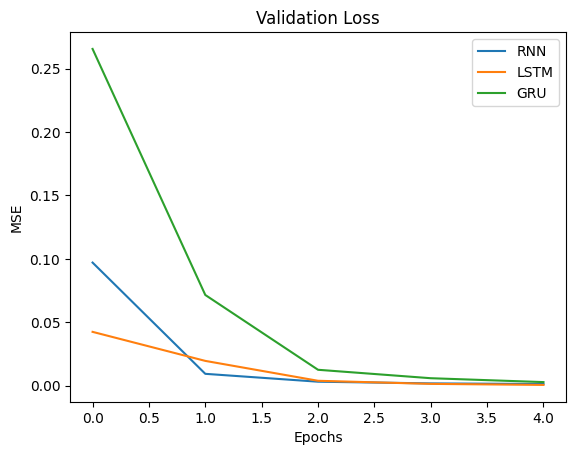

RNN: 0.0012279911898076534
LSTM: 0.000672395690344274
GRU: 0.0029543207492679358


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,LSTM,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb


(xtrain,ytrain),(xtest,ytest)=imdb.load_data(num_words=10000)
xtrain=pad_sequences(xtrain,maxlen=200)
xtest=pad_sequences(xtest,maxlen=200)


def make_model(mode):
    model=Sequential()
    model.add(Embedding(10000,32,input_length=200))     
    if mode == 'rnn': model.add(SimpleRNN(32))
    if mode == 'lstm': model.add(LSTM(32))
    if mode == 'gru': model.add(GRU(32))

    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

config=['rnn','lstm','gru']
history={}

for i in config:
    model=make_model(i)
    h=model.fit(xtrain,ytrain,epochs=5,batch_size=64,validation_data=(xtest,ytest))
    history[i]=h.history
    

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for name,log in history.items():
    plt.plot(log['accuracy'],label=name)
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(1,2,2)
for name,log in history.items():
    plt.plot(log['loss'],label=name)
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()
plt.show()